In [1]:
import os
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# ========= 設定參數 =========
model_path = 'best_model.h5'  # ✅ 確認你的模型檔案是否與本檔案在同一層
img_size = 128  # ✅ 與訓練時一致
categories = ['lion', 'leopard']  # ✅ 與訓練順序一致

In [8]:
# ========= 載入模型 =========
model = tf.keras.models.load_model('best_model.h5')

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce GTX 1650, compute capability 7.5


In [11]:
# ========= 預測新圖片 =========
data_dir = r'C:\Users\Louis\Desktop\project\cnn-animals\new_images'  # ✅ 確保此資料夾存在，結構為 new_images/lion/*.jpg, new_images/leopard/*.jpg
results = []

for actual_label in categories:
    folder = os.path.join(data_dir, actual_label)
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)

        try:
            # 圖片處理
            img = load_img(img_path, target_size=(img_size, img_size))
            img_array = img_to_array(img) / 255.0
            img_array = np.expand_dims(img_array, axis=0)

            # 預測
            prediction = model.predict(img_array, verbose=0)
            predicted_index = np.argmax(prediction)
            predicted_label = categories[predicted_index]
            confidence = round(float(np.max(prediction)), 4)

            results.append({
                'filename': img_name,
                'actual_label': actual_label,
                'predicted_label': predicted_label,
                'confidence': confidence
            })

        except Exception as e:
            print(f"❌ Error loading {img_path}: {e}")

In [12]:
# ========= 儲存預測結果 =========
df = pd.DataFrame(results)
df.to_csv('prediction_results.csv', index=False)
print("✅ 預測完成，結果儲存到 prediction_results.csv")

✅ 預測完成，結果儲存到 prediction_results.csv


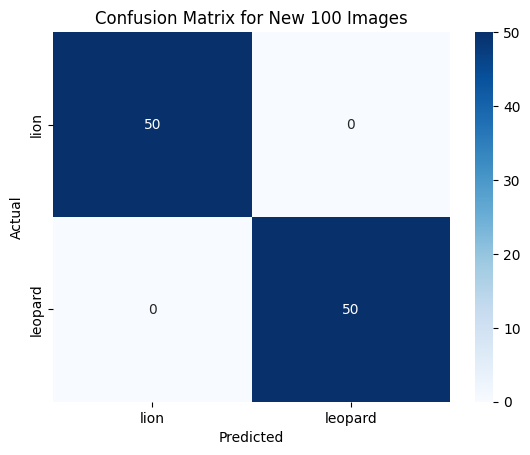

In [13]:
# ========= 混淆矩陣繪圖 =========
cm = confusion_matrix(df['actual_label'], df['predicted_label'], labels=categories)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=categories, yticklabels=categories, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for New 100 Images")
plt.show()

In [14]:
confidence = round(float(np.max(prediction)), 4)